                                                  text  labels
0                      ¿A qué hora abren los domingos?       0
1       ¿Tienen alguna promoción para nuevos clientes?       0
2                    ¿Cuánto cuesta el envío a Madrid?       0
3    ¿Puedo devolver un producto si no estoy satisf...       0
4         ¿Dónde puedo encontrar el manual de usuario?       0
..                                                 ...     ...
252  Este lugar es perfecto para compras rápidas, l...       2
253  Siempre recomiendo este sitio a mis amigos, gr...       2
254  Este es mi lugar favorito para hacer compras, ...       2
255  Recomiendo probar su servicio de suscripción, ...       2
256  Muy buena atención y rapidez, recomiendo este ...       2

[257 rows x 2 columns]
Datos de entrenamiento:
                                                  text  labels
149  No me dieron el reembolso completo que me habí...       1
31    ¿Cómo puedo cambiar mi dirección de facturación?       0
87   ¿P

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0it [00:00, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 5:   0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 5:   0%|          | 0/26 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/26 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/26 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/26 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Resultados de la evaluación:
{'mcc': 1.0, 'eval_loss': 0.0023726867511868477}


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Predicciones incorrectas:
               precision    recall  f1-score   support

    Solicitud       1.00      1.00      1.00        19
        Queja       1.00      1.00      1.00        17
Recomendación       1.00      1.00      1.00        16

     accuracy                           1.00        52
    macro avg       1.00      1.00      1.00        52
 weighted avg       1.00      1.00      1.00        52



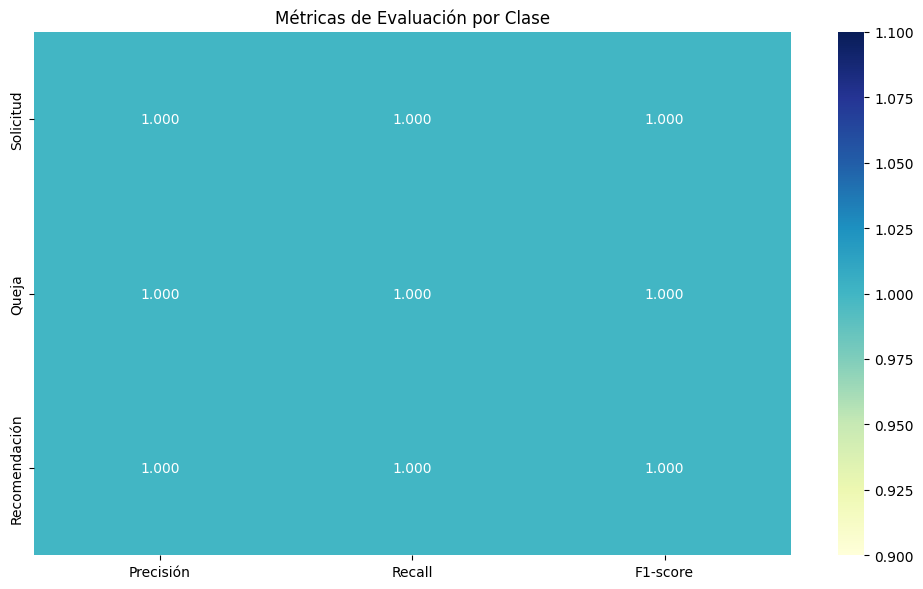


Métricas promedio:
Precisión promedio: 1.000
Recall promedio: 1.000
F1-score promedio: 1.000


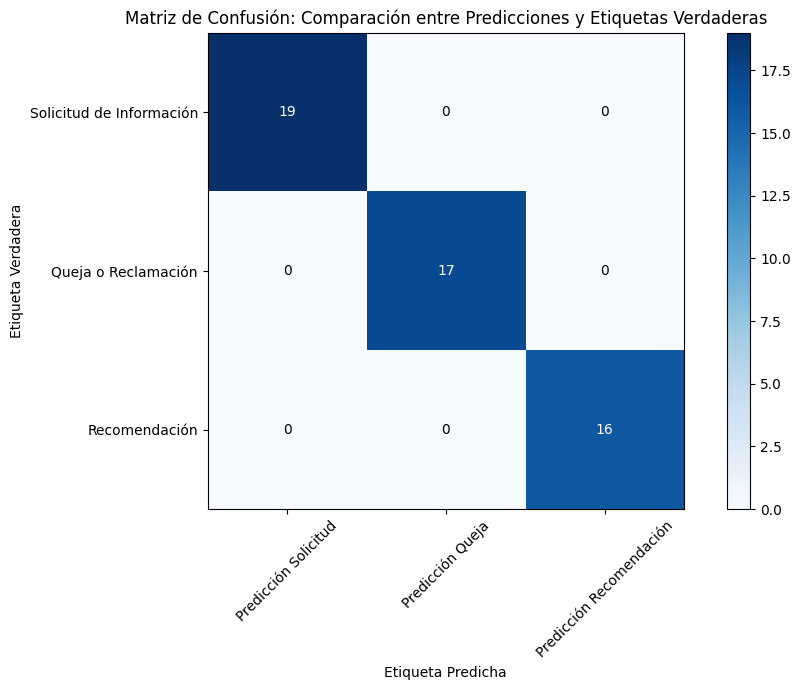

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Texto: ¿Podrían explicarme por qué sus precios son tan altos en comparación con la competencia?
Etiqueta asignada: 0
Predicción del modelo: 0
----
Texto: Me gustaría saber si tienen algún producto similar al excelente modelo X de la marca Y
Etiqueta asignada: 0
Predicción del modelo: 1
----
Texto: ¿Cuándo van a mejorar su pésimo servicio de atención al cliente?
Etiqueta asignada: 0
Predicción del modelo: 0
----
Texto: Aunque normalmente recomiendo sus servicios, esta vez estoy muy decepcionado con la calidad del producto
Etiqueta asignada: 1
Predicción del modelo: 2
----
Texto: El producto que recibí está defectuoso. ¿Podrían indicarme cómo proceder con la devolución?
Etiqueta asignada: 1
Predicción del modelo: 0
----
Texto: Su servicio al cliente es terrible, pero me pregunto si tienen alguna política de compensación
Etiqueta asignada: 1
Predicción del modelo: 1
----
Texto: Recomiendo este producto a pesar de que la entrega fue un poco lenta. ¿Tienen planes para mejorar los tiempos de

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [35]:
# Este programa implementa un clasificador de texto basado en BERT para categorizar mensajes en tres clases:
# solicitudes de información, quejas o reclamaciones, y recomendaciones.
# El objetivo es demostrar la capacidad de utilizar modelos de lenguaje preentrenados
# para tareas de clasificación de texto en español, incluyendo la preparación de datos,
# entrenamiento del modelo, evaluación y análisis de resultados.

import pandas as pd
from sklearn.model_selection import train_test_split
!pip install simpletransformers
from simpletransformers.classification import ClassificationModel
import multiprocessing as mp
from sklearn.metrics import classification_report, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración para evitar problemas con os.fork() en entornos multihilo
mp.set_start_method('spawn', force=True)

# Crear el corpus inventado con las tres categorías: "solicitud de información" (categoría 0), "queja o reclamación" (categoría 1), "recomendación" (categoría 2)

categoria_0 = [ # Solicitud de información
    ["¿A qué hora abren los domingos?", 0],
    ["¿Tienen alguna promoción para nuevos clientes?", 0],
    ["¿Cuánto cuesta el envío a Madrid?", 0],
    ["¿Puedo devolver un producto si no estoy satisfecho?", 0],
    ["¿Dónde puedo encontrar el manual de usuario?", 0],
    ["¿Hay estacionamiento cerca de la tienda?", 0],
    ["¿Aceptan pagos con PayPal?", 0],
    ["¿Cuáles son los requisitos para aplicar a la oferta de trabajo?", 0],
    ["¿Cuánto tiempo tarda el servicio de reparación?", 0],
    ["¿Me podrían enviar un catálogo de productos?", 0],
    ["¿Puedo cambiar la dirección de entrega después de hacer el pedido?", 0],
    ["¿Este producto tiene garantía?", 0],
    ["¿Dónde se encuentra la sucursal más cercana?", 0],
    ["¿Hacen entregas los fines de semana?", 0],
    ["¿Tienen envío internacional?", 0],
    ["¿Puedo modificar mi pedido después de realizarlo?", 0],
    ["¿Cómo puedo rastrear mi pedido?", 0],
    ["¿Tienen tienda física?", 0],
    ["¿Cuánto cuesta una membresía anual?", 0],
    ["¿Cómo puedo cancelar mi suscripción?", 0],
    ["¿Puedo pagar en efectivo al recibir mi pedido?", 0],
    ["¿Cuánto tardan los envíos en llegar?", 0],
    ["¿Dónde puedo ver el estado de mi pedido?", 0],
    ["¿Puedo reservar un producto que está fuera de stock?", 0],
    ["¿Tienen servicio de atención al cliente 24/7?", 0],
    ["¿Cuál es el tiempo de garantía de los productos?", 0],
    ["¿Cuáles son las opciones de pago disponibles?", 0],
    ["¿Puedo solicitar una factura con mis datos fiscales?", 0],
    ["¿Cuál es el horario de atención al cliente?", 0],
    ["¿Puedo recibir asistencia técnica a domicilio?", 0],
    ["¿Hay algún cargo adicional por pagos con tarjeta?", 0],
    ["¿Cómo puedo cambiar mi dirección de facturación?", 0],
    ["¿Dónde puedo encontrar su política de privacidad?", 0],
    ["¿Qué métodos de pago aceptan?", 0],
    ["¿Ofrecen servicio de instalación?", 0],
    ["¿Puedo programar la entrega en una fecha específica?", 0],
    ["¿Cuántas cuotas puedo pagar con tarjeta de crédito?", 0],
    ["¿Cuál es el costo del servicio técnico?", 0],
    ["¿Cómo puedo registrarme para recibir noticias y promociones?", 0],
    ["¿Puedo recibir una cotización para una compra mayorista?", 0],
    ["¿Cuál es su política de devoluciones?", 0],
    ["¿Tienen descuentos por compras grandes?", 0],
    ["¿Hay algún cargo por cancelación de pedido?", 0],
    ["¿Cuáles son los tiempos de entrega estándar?", 0],
    ["¿Puedo cambiar el método de pago después de realizar el pedido?", 0],
    ["¿Cómo puedo contactar con su servicio de atención al cliente?", 0],
    ["¿Tienen algún programa de fidelidad?", 0],
    ["¿Puedo hacer un pedido personalizado?", 0],
    ["¿Cómo puedo saber si mi pedido ha sido enviado?", 0],
    ["¿Tienen algún descuento para estudiantes?", 0],
    ["¿Cómo puedo modificar los datos de mi cuenta?", 0],
    ["¿Puedo añadir productos a mi pedido una vez realizado?", 0],
    ["¿Puedo hacer una reserva de producto en línea?", 0],
    ["¿Cuál es el número de contacto para servicio al cliente?", 0],
    ["¿Puedo pagar con tarjeta de débito?", 0],
    ["¿Tienen política de protección de datos personales?", 0],
    ["¿Tienen servicio de chat en vivo?", 0],
    ["¿Puedo obtener un reembolso si no estoy satisfecho?", 0],
    ["¿Tienen opciones de financiación?", 0],
    ["¿Ofrecen tarjetas de regalo?", 0],
    ["¿Cómo puedo obtener una copia de mi recibo de compra?", 0],
    ["¿Tienen productos en oferta actualmente?", 0],
    ["¿Puedo hacer un seguimiento en tiempo real de mi envío?", 0],
    ["¿Tienen garantía extendida?", 0],
    ["¿Ofrecen soporte técnico telefónico?", 0],
    ["¿Puedo cancelar mi pedido antes de que sea enviado?", 0],
    ["¿Tienen alguna promoción especial por temporada?", 0],
    ["¿Cuánto tarda el reembolso una vez aprobado?", 0],
    ["¿Dónde puedo descargar su aplicación móvil?", 0],
    ["¿Qué hago si olvidé mi contraseña?", 0],
    ["¿Cuáles son los horarios de entrega?", 0],
    ["¿Tienen productos exclusivos en línea?", 0],
    ["¿Cómo puedo suscribirme a su boletín de noticias?", 0],
    ["¿Ofrecen asistencia en la instalación de productos?", 0],
    ["¿Cómo puedo cancelar una suscripción a su servicio?", 0],
    ["¿Puedo programar una cita en su tienda?", 0],
    ["¿Tienen productos ecológicos?", 0],
    ["¿Tienen servicio de atención por teléfono?", 0],
    ["¿Qué hago si mi producto no funciona correctamente?", 0],
    ["¿Ofrecen envíos express?", 0],
    ["¿Cómo puedo hacer una queja formal?", 0],
    ["¿Puedo cambiar mi correo electrónico registrado?", 0],
    ["¿Cómo puedo agregar una nueva dirección de entrega?", 0],
    ["¿Ofrecen productos para empresas?", 0],
    ["¿Cuál es su política de intercambio de productos?", 0],
    ["¿Puedo obtener puntos por compras realizadas?", 0],
    ["¿Cómo puedo verificar la disponibilidad de productos?", 0],
    ["¿Puedo programar una devolución de producto en línea?", 0],
    ["¿Ofrecen atención en otros idiomas?", 0],
    ["¿Puedo transferir mi pedido a otra persona?", 0],
    ["¿Puedo recoger mi pedido en una tienda física?", 0],
    ["¿Cómo puedo aplicar un código de descuento?", 0],
    ["¿Cuáles son las políticas de seguridad en su sitio web?", 0],
]


categoria_1 = [ # Queja o reclamación
    ["El producto llegó roto, quiero un reembolso.", 1],
    ["El servicio al cliente fue pésimo, nadie me ayudó.", 1],
    ["Hice un pedido hace una semana y todavía no llega.", 1],
    ["El pedido llegó incompleto, faltan productos.", 1],
    ["El sitio web es muy lento, apenas pude hacer mi pedido.", 1],
    ["Pedí una talla M y me mandaron una S, esto es inaceptable.", 1],
    ["La comida llegó fría y mal presentada.", 1],
    ["Me cobraron de más en mi factura, necesito una solución.", 1],
    ["El técnico nunca apareció en la cita programada.", 1],
    ["El producto no cumple con las especificaciones que anunciaron.", 1],
    ["La entrega fue muy tarde, ya no la necesitaba.", 1],
    ["El pedido llegó a la dirección equivocada.", 1],
    ["Estoy muy descontento con la calidad del servicio.", 1],
    ["El producto llegó dañado y no puedo usarlo.", 1],
    ["El envío fue más caro de lo que me dijeron al principio.", 1],
    ["El pedido fue cancelado sin ninguna explicación.", 1],
    ["El reembolso tardó demasiado en procesarse.", 1],
    ["No recibí el producto que había solicitado.", 1],
    ["El soporte técnico no fue capaz de resolver mi problema.", 1],
    ["No me enviaron la factura de mi compra.", 1],
    ["La atención en la tienda fue muy deficiente.", 1],
    ["El pedido llegó con piezas faltantes.", 1],
    ["Me prometieron un descuento que no fue aplicado.", 1],
    ["El embalaje del producto estaba en mal estado.", 1],
    ["El producto que compré no funciona correctamente.", 1],
    ["El proceso de devolución es demasiado complicado.", 1],
    ["El sistema de pago tuvo errores y duplicó mi compra.", 1],
    ["El servicio de entrega fue muy ineficiente.", 1],
    ["El producto no era como lo describieron en la web.", 1],
    ["Tuve que esperar mucho tiempo para recibir asistencia.", 1],
    ["El técnico instaló mal el producto.", 1],
    ["El pedido llegó tarde y no lo pude usar.", 1],
    ["El servicio al cliente no responde a mis correos.", 1],
    ["Recibí productos que no pedí.", 1],
    ["El producto no cumplió con mis expectativas.", 1],
    ["No me dieron ninguna solución a mi problema.", 1],
    ["El repartidor fue grosero y maleducado.", 1],
    ["Mi pedido fue cancelado sin motivo aparente.", 1],
    ["La comida llegó con mal sabor y en malas condiciones.", 1],
    ["El soporte por chat fue inútil, no resolvieron nada.", 1],
    ["Me enviaron productos que no estaban en mi pedido.", 1],
    ["El servicio que recibí no justificaba el precio.", 1],
    ["El proceso de compra fue muy confuso y complicado.", 1],
    ["El producto llegó con un defecto de fábrica.", 1],
    ["Me cobraron por un servicio que nunca recibí.", 1],
    ["No pude cancelar el pedido a tiempo.", 1],
    ["El paquete llegó abierto y en malas condiciones.", 1],
    ["El producto se rompió después de usarlo solo una vez.", 1],
    ["El sistema de pagos falló y me cobraron dos veces.", 1],
    ["El reembolso fue menor al precio que pagué.", 1],
    ["El pedido llegó sin el accesorio principal.", 1],
    ["La plataforma web se cae constantemente.", 1],
    ["El producto estaba fuera de stock pero igual me cobraron.", 1],
    ["El servicio técnico fue muy lento en venir a revisar el producto.", 1],
    ["Me hicieron esperar mucho tiempo en la línea de atención al cliente.", 1],
    ["El producto no llegó en el color que pedí.", 1],
    ["No me dieron el reembolso completo que me habían prometido.", 1],
    ["El pedido llegó a una dirección incorrecta y no lo recuperé.", 1],
    ["El producto se dañó antes de la fecha de entrega.", 1],
    ["El producto estaba usado cuando llegó.", 1],
    ["No me dieron una solución satisfactoria a mi problema.", 1],
    ["El servicio fue muy caro para lo que ofrecieron.", 1],
    ["Tuve que hacer muchas llamadas para resolver mi problema.", 1],
    ["El producto no es compatible con lo que indicaron.", 1],
    ["La experiencia de compra en línea fue terrible.", 1],
    ["El servicio prometido nunca fue entregado.", 1],
    ["El pedido nunca llegó y nadie me dio explicaciones.", 1],
    ["El servicio al cliente fue muy grosero y poco servicial.", 1],
    ["El pedido fue entregado a otra persona.", 1],
    ["El producto venía con piezas rotas y no me ofrecieron una solución.", 1],
    ["El soporte técnico no respondió a mi solicitud de ayuda.", 1],
    ["La comida llegó en mal estado y con mal olor.", 1],
    ["Me hicieron esperar más de una hora en la tienda.", 1],
    ["El producto no era el que se mostraba en la página web.", 1],
    ["El sistema de devoluciones es muy engorroso y confuso.", 1],
    ["El servicio al cliente me dio información errónea.", 1],
    ["El proceso de pago fue confuso y complicado.", 1],
    ["El producto llegó defectuoso y no lo reemplazaron.", 1],
    ["El repartidor no llegó en el horario prometido.", 1],
    ["El pedido fue enviado a otro país por error.", 1],
    ["El producto se rompió a los pocos días de uso.", 1],
    ["Me hicieron pagar más por un servicio adicional sin mi consentimiento.", 1],
    ["El paquete llegó incompleto y no me dieron una solución.", 1],
]


categoria_2 = [ # Recomendación
    ["Recomiendo totalmente esta tienda, siempre cumplen con los tiempos.", 2],
    ["Si buscan buen servicio al cliente, esta es la empresa adecuada.", 2],
    ["Les sugiero que prueben el nuevo menú, es realmente delicioso.", 2],
    ["Mis amigos también han comprado aquí y están muy contentos.", 2],
    ["No duden en comprar en este sitio, nunca he tenido problemas.", 2],
    ["Recomiendo usar esta app, es muy fácil de usar y eficiente.", 2],
    ["Si necesitan ropa de calidad, esta tienda es la mejor opción.", 2],
    ["Mis colegas y yo siempre utilizamos sus servicios, muy recomendados.", 2],
    ["Es la mejor opción si buscan algo confiable y rápido.", 2],
    ["Recomiendo esta marca, siempre cumplen con sus promesas.", 2],
    ["Recomiendo que todos prueben su servicio de suscripción, es genial.", 2],
    ["Este restaurante es excelente, recomiendo a todos que lo visiten.", 2],
    ["Recomiendo este producto a cualquiera que necesite durabilidad y calidad.", 2],
    ["El servicio fue impecable, definitivamente lo recomendaré a todos.", 2],
    ["Me encanta comprar aquí, siempre tienen lo que necesito.", 2],
    ["Este lugar es mi favorito, siempre son puntuales y amables.", 2],
    ["Muy recomendable, excelente servicio y atención.", 2],
    ["Todos en mi familia compran aquí, siempre satisfechos.", 2],
    ["Sin duda recomendaré este sitio a todos mis conocidos.", 2],
    ["Gran servicio y productos de calidad, muy recomendable.", 2],
    ["Nunca he tenido problemas con ellos, siempre a tiempo.", 2],
    ["Me encanta la atención personalizada que ofrecen, lo recomiendo.", 2],
    ["Mis compañeros de trabajo también utilizan esta plataforma y les encanta.", 2],
    ["Altamente recomendable, sus productos nunca decepcionan.", 2],
    ["Este servicio es el mejor que he probado en mucho tiempo.", 2],
    ["Una de las mejores tiendas online, la recomiendo siempre.", 2],
    ["Si buscan calidad, esta es la tienda que necesitan.", 2],
    ["Gran experiencia, recomendaré a mis amigos que compren aquí.", 2],
    ["Este restaurante nunca me decepciona, altamente recomendado.", 2],
    ["Siempre tienen promociones increíbles, recomiendo aprovecharlas.", 2],
    ["Recomiendo esta tienda a todos los que buscan rapidez y buen trato.", 2],
    ["Muy buena experiencia, recomiendo este sitio sin dudar.", 2],
    ["La calidad de los productos es excepcional, lo recomiendo.", 2],
    ["Recomendaría este servicio a cualquiera que busque eficiencia.", 2],
    ["Es mi primera opción cuando necesito algo rápido y confiable.", 2],
    ["Recomiendo esta empresa a todos los que buscan soluciones rápidas.", 2],
    ["Siempre tengo una gran experiencia al comprar aquí, lo recomiendo.", 2],
    ["Este es mi lugar favorito para hacer compras en línea, recomendado.", 2],
    ["Excelente atención y productos, no dudaría en recomendarlo.", 2],
    ["Siempre recomiendo este servicio a mis amigos y familiares.", 2],
    ["Una de las mejores experiencias de compra en línea, recomendado.", 2],
    ["El servicio al cliente es de primera, lo recomiendo ampliamente.", 2],
    ["Recomiendo esta tienda para cualquiera que busque productos de calidad.", 2],
    ["Una experiencia positiva en cada compra, siempre recomiendo.", 2],
    ["Siempre satisfecho con sus productos y atención, muy recomendable.", 2],
    ["La app es muy fácil de usar, recomiendo que la descarguen.", 2],
    ["La calidad del servicio es inigualable, lo recomiendo siempre.", 2],
    ["Este restaurante nunca me falla, lo recomiendo a todos.", 2],
    ["Recomiendo suscribirse a su servicio, es muy conveniente.", 2],
    ["Si buscan algo seguro y confiable, este es el lugar.", 2],
    ["Siempre recomiendo sus productos a mis amigos, son excelentes.", 2],
    ["Recomiendo esta marca a todos, nunca me ha fallado.", 2],
    ["Muy buena atención y productos, lo recomiendo a todos.", 2],
    ["Este sitio es el mejor para compras rápidas, siempre lo recomiendo.", 2],
    ["Mis colegas y yo siempre confiamos en este servicio, altamente recomendado.", 2],
    ["El producto que compré es increíble, lo recomiendo a todos.", 2],
    ["Recomiendo este restaurante, siempre ofrecen la mejor comida.", 2],
    ["Este servicio de suscripción es perfecto para lo que necesito, lo recomiendo.", 2],
    ["Recomiendo este sitio para cualquiera que busque fiabilidad.", 2],
    ["Mis amigos siempre compran aquí por mi recomendación, muy satisfechos.", 2],
    ["Nunca dudo en recomendar este sitio, siempre cumplen.", 2],
    ["Este es el lugar que recomiendo cuando buscan calidad.", 2],
    ["Siempre son mi primera opción, recomiendo su servicio.", 2],
    ["Recomiendo esta empresa para cualquier persona que busque un buen servicio.", 2],
    ["He recomendado este servicio a muchos amigos, todos contentos.", 2],
    ["Excelente servicio al cliente, lo recomiendo mucho.", 2],
    ["Este producto es de lo mejor que he probado, altamente recomendado.", 2],
    ["Recomiendo esta marca a todos los que buscan calidad y buen precio.", 2],
    ["Es mi lugar de confianza, lo recomiendo a todos mis conocidos.", 2],
    ["Recomendaría este servicio a cualquiera que busque eficiencia y rapidez.", 2],
    ["Siempre es una buena experiencia comprar aquí, lo recomiendo.", 2],
    ["Este restaurante siempre cumple, lo recomiendo mucho.", 2],
    ["Recomiendo este servicio a cualquier persona que busque comodidad.", 2],
    ["Este sitio es excelente para compras online, recomiendo usarlo.", 2],
    ["Siempre recomiendo este sitio a todos mis amigos, nunca me ha fallado.", 2],
    ["Recomiendo este servicio a cualquiera que busque productos de calidad.", 2],
    ["Este lugar es perfecto para compras rápidas, lo recomiendo mucho.", 2],
    ["Siempre recomiendo este sitio a mis amigos, gran experiencia.", 2],
    ["Este es mi lugar favorito para hacer compras, recomiendo mucho.", 2],
    ["Recomiendo probar su servicio de suscripción, es muy eficiente.", 2],
    ["Muy buena atención y rapidez, recomiendo este sitio siempre.", 2],
]

# Combinar las tres categorías en una sola lista
data = categoria_0 + categoria_1 + categoria_2

# Convertir a DataFrame para facilitar su manejo en el modelo
df = pd.DataFrame(data, columns=["text", "labels"])

# Mostrar el DataFrame para verificar el contenido
print(df)

# Convertir las etiquetas a enteros (paso útil si se trabaja con diferentes tipos de datos)
df['labels'] = df['labels'].astype(int)

# --- División del dataset en conjunto de entrenamiento y evaluación ---
#20% de los datos para evaluar y el resto para entrenar
train_df, eval_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)


print("Datos de entrenamiento:")
print(train_df.head())
print("\nDatos de evaluación:")
print(eval_df.head())

# --- Configuración del modelo BERT preentrenado en español ---
model = ClassificationModel(
    'bert',
    'dccuchile/bert-base-spanish-wwm-uncased',  # Modelo en español preentrenado
    num_labels=3,  # Número de clases en nuestro problema de clasificación
    args={
        'overwrite_output_dir': True,  # Permite sobrescribir resultados anteriores para facilitar múltiples ejecuciones
        'num_train_epochs': 5,  # Número de épocas de entrenamiento
        'learning_rate': 2e-5  # Tasa de aprendizaje estándar para el ajuste fino (fine-tuning) de BERT
    }
)


# Explicación de los parámetros:
# - 'bert': utilizamos la arquitectura BERT por su eficacia en tareas de procesamiento de lenguaje natural.
# - 'dccuchile/bert-base-spanish-wwm-uncased': Este modelo está preentrenado específicamente en español,
#   lo que lo hace ideal para nuestro conjunto de datos en español.
# - num_labels=3: Corresponde a nuestras tres categorías: solicitud de información, queja y recomendación.
# - overwrite_output_dir=True: Facilita la experimentación al permitir múltiples ejecuciones sin conflictos.
# - num_train_epochs=5: Un número moderado de épocas que busca un equilibrio entre suficiente aprendizaje
#   y evitar el sobreajuste.
# - learning_rate=2e-5: Esta es una tasa de aprendizaje comúnmente utilizada para fine-tuning de BERT,
#   que permite un ajuste fino sin desestabilizar los conocimientos previos del modelo.

# --- Entrenar el modelo ---
# Entrenamos el modelo con los datos de entrenamiento. El modelo ajusta los pesos para nuestra tarea de clasificación.
model.train_model(train_df)

# --- Evaluar el modelo ---
# Evaluamos el modelo usando los datos de evaluación y obtenemos las métricas de rendimiento
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Mostrar los resultados de la evaluación
print("Resultados de la evaluación:")
print(result)

# --- Predicciones ---
# Realizamos predicciones sobre el conjunto de evaluación
predictions, raw_outputs = model.predict(eval_df['text'].tolist())

# Mostrar las predicciones incorrectas para entender dónde falla el modelo
print("Predicciones incorrectas:")
for i, (pred, true) in enumerate(zip(predictions, eval_df['labels'])):
    if pred != true:
        print(f"Texto: {eval_df.iloc[i]['text']}")
        print(f"Etiqueta predicha: {pred}")
        print(f"Etiqueta real: {true}\n")

# Asignar las etiquetas verdaderas y las predicciones para el cálculo de las métricas
y_true = eval_df['labels'].tolist()  # Etiquetas verdaderas del conjunto de evaluación
y_pred = predictions  # Predicciones hechas por el modelo

# Explicación de las métricas principales:
# Las métricas clave para entender el rendimiento de nuestro modelo son:
#
# 1. Precisión (precision):
#    - Mide la proporción de predicciones positivas que son correctas.
#    - Una alta precisión indica que cuando el modelo predice una clase, suele estar en lo cierto.
#
# 2. Exhaustividad (recall):
#    - Mide la proporción de casos positivos reales que fueron identificados correctamente.
#    - Un alto recall indica que el modelo es bueno detectando la mayoría de los casos de una clase.
#
# 3. Puntuación F1 (F1-Score):
#    - Es la media armónica de precisión y recall, proporcionando un balance entre ambas métricas.
#    - Un F1-score alto indica un buen equilibrio entre precisión y exhaustividad.
#
# Estas métricas nos ayudan a entender lo bien que está funcionando nuestro modelo en la clasificación
# de textos en las categorías de solicitud de información, queja o reclamación y recomendación.

# Calcular precisión, recall y F1-score
report = classification_report(y_true, y_pred, target_names=["Solicitud", "Queja", "Recomendación"], output_dict=True)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

# Imprimir el informe de clasificación
print(classification_report(y_true, y_pred, target_names=["Solicitud", "Queja", "Recomendación"]))

# Crear un DataFrame con las métricas
df_metrics = pd.DataFrame({
    'Precisión': precision,
    'Recall': recall,
    'F1-score': f1_score
}, index=["Solicitud", "Queja", "Recomendación"])

# Visualizar las métricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_metrics, annot=True, cmap="YlGnBu", fmt='.3f')
plt.title('Métricas de Evaluación por Clase')
plt.tight_layout()
plt.show()

# Calcular y mostrar las métricas promedio
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1 = np.mean(f1_score)

print(f"\nMétricas promedio:")
print(f"Precisión promedio: {avg_precision:.3f}")
print(f"Recall promedio: {avg_recall:.3f}")
print(f"F1-score promedio: {avg_f1:.3f}")

# --- Generar la Matriz de confusión para visualizar los resultados ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Usa las etiquetas verdaderas y las predicciones para construir la matriz de confusión
y_true = eval_df['labels'].tolist()  # Etiquetas verdaderas del conjunto de evaluación
y_pred = predictions  # Predicciones hechas por el modelo

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Convertir la matriz de confusión en un DataFrame para facilitar la visualización
df_cm = pd.DataFrame(cm, index=["Solicitud de Información", "Queja o Reclamación", "Recomendación"],
                     columns=["Predicción Solicitud", "Predicción Queja", "Predicción Recomendación"])

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
plt.title('Matriz de Confusión: Comparación entre Predicciones y Etiquetas Verdaderas')
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()

# Etiquetas para los ejes
tick_marks = np.arange(len(df_cm))
plt.xticks(tick_marks, df_cm.columns, rotation=45)
plt.yticks(tick_marks, df_cm.index)

# Añadir los valores dentro de las celdas de la matriz de confusión
# Añadir los valores dentro de las celdas de la matriz de confusión
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f"{cm[i, j]:d}", ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")


plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# --- Ejemplos desafiantes para probar los límites del modelo ---

#Introducción de ejemplos desafiantes:
#
#Dado que nuestro modelo ha mostrado métricas de evaluación perfectas en el conjunto de datos
#de prueba, es crucial introducir ejemplos más complejos y ambiguos para:
#
#1. Probar los límites reales del modelo en situaciones más cercanas al mundo real.
#2. Identificar posibles áreas de mejora o limitaciones del modelo.
#3. Evaluar la robustez del modelo frente a entradas más complejas o ambiguas.
#
#Estos ejemplos son considerados desafiantes porque:
#
#a) Contienen elementos de múltiples categorías, lo que puede confundir al modelo.
#b) Usan lenguaje más sutil o indirecto que los ejemplos de entrenamiento.
#c) Presentan casos límite que podrían clasificarse en más de una categoría.
#
#Lo que esperamos aprender:
#
#1. La capacidad del modelo para manejar entradas complejas y ambiguas.
#2. Posibles sesgos o limitaciones en la comprensión del contexto por parte del modelo.
#3. Áreas donde el modelo podría necesitar más entrenamiento o ajuste fino.
#4. La robustez general del modelo en situaciones más realistas y desafiantes.
#
#Este análisis nos ayudará a entender mejor el rendimiento real del modelo y a identificar
#áreas de mejora para futuras iteraciones del proyecto.

ejemplos_desafiantes = [
    # Solicitudes de Información con elementos de queja o recomendación
    ["¿Podrían explicarme por qué sus precios son tan altos en comparación con la competencia?", 0],
    ["Me gustaría saber si tienen algún producto similar al excelente modelo X de la marca Y", 0],
    ["¿Cuándo van a mejorar su pésimo servicio de atención al cliente?", 0],

    # Quejas o Reclamaciones con elementos de solicitud de información o recomendación
    ["Aunque normalmente recomiendo sus servicios, esta vez estoy muy decepcionado con la calidad del producto", 1],
    ["El producto que recibí está defectuoso. ¿Podrían indicarme cómo proceder con la devolución?", 1],
    ["Su servicio al cliente es terrible, pero me pregunto si tienen alguna política de compensación", 1],

    # Recomendaciones con elementos de queja o solicitud de información
    ["Recomiendo este producto a pesar de que la entrega fue un poco lenta. ¿Tienen planes para mejorar los tiempos de envío?", 2],
    ["El servicio es genial, pero los precios son un poco altos. Aun así, creo que vale la pena probarlo", 2],
    ["Aunque tuve algunos problemas al principio, ahora recomiendo totalmente este servicio. ¿Ofrecen descuentos para clientes frecuentes?", 2],

    # Ejemplos muy ambiguos
    ["No estoy seguro si estoy satisfecho o decepcionado con mi compra. ¿Tienen alguna política de devolución?", 0],  # Podría ser 0 o 1
    ["Su producto es bueno, pero el servicio al cliente necesita mejorar. ¿Cómo puedo contactar a un supervisor?", 1],  # Podría ser 1 o 2
    ["Me gustaría recomendar su tienda, pero primero necesito saber más sobre sus políticas de privacidad", 2],  # Podría ser 0 o 2

    # Ejemplos con múltiples intenciones
    ["Quiero quejarme del retraso en mi pedido, pero también preguntar si tienen disponible el producto en otro color. Por cierto, mis amigos hablan muy bien de su tienda", 1],  # Mezcla de 1, 0 y 2
    ["Aunque recomiendo su servicio, tengo una pregunta sobre la facturación y una queja sobre el último envío", 2],  # Mezcla de 2, 0 y 1
    ["¿Podrían explicarme por qué debería elegir su producto sobre el de la competencia? He oído cosas buenas, pero también algunas quejas", 0]  # Mezcla de 0 y 2, con un toque de 1
]

# Código para usar estos ejemplos en el modelo
predictions, raw_outputs = model.predict([ejemplo[0] for ejemplo in ejemplos_desafiantes])

# Comparar las predicciones con las etiquetas asignadas
for i, (texto, etiqueta) in enumerate(ejemplos_desafiantes):
    print(f"Texto: {texto}")
    print(f"Etiqueta asignada: {etiqueta}")
    print(f"Predicción del modelo: {predictions[i]}")
    print("----")

# Calcular la precisión en estos ejemplos desafiantes
precision_desafiantes = sum([1 for i, (_, etiqueta) in enumerate(ejemplos_desafiantes) if predictions[i] == etiqueta]) / len(ejemplos_desafiantes)
print(f"Precisión en ejemplos desafiantes: {precision_desafiantes:.2f}")